# Chapter4: Classification

* Predict qualitative response (categorical)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ISLR_data/Default.csv')

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
X = df['balance']
y = 1*(df['default']=='Yes')

# Logistic Regression

Why not Linear Regression ?

* order ของค่า y (response) อย่างเช่น 0, 1, 2 มีผลในการทำ Linear regression ระยะห่างระหว่าง 0 และ 1 มีความหมายอย่างไร order ระหว่าง 0 ไป 1 กับ 1 ไป 2 มีความเท่ากันไหม เรื่องนี้ส่งผลต่อการทำ linear regression ซึ่งในทางปฏิบัติเราไม่มีทางรู้ได้อย่างแน่ชัด อย่างเช่นการ classify ชื่อโรคเป็นต้น แต่ในกรณีที่มี 2 class การสลับการ encoding ไม่ส่งผลในการ predict $\hat{y}$

* การใช้ linear regression จะทำให้ค่าที่ predict ออกมามีช่วงที่มากกว่า 0 และ 1 ซึ่ง ไม่สามารถตีความได้ง่ายในเชิงความน่าจะเป็น

In [6]:
X = sm.add_constant(X)
lin_reg = sm.OLS(y,X).fit()
log_reg = sm.Logit(y, X).fit()
print(lin_reg.summary())
print(log_reg.summary())
y_pred_lin = lin_reg.predict(X)
y_pred_log = log_reg.predict(X)

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          2.77e-286
Time:                        05:02:33   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#Logistic model

Logistic regression จะ model ค่าความน่าจะเป็นของ y ด้วย $P(y|X)$ ซึ่งเราอาจตั้งไว้ว่าเมื่อค่าความน่าจะเป็นมากกว่า 0.5 จะ classify เป็น class 1 หรืออาจตั้งค่า threshold ให้ต่ำกว่าหรือสูงกว่า 0.5 ก็ได้

* ในกรณี linear regression เราจะ model $P(y=1|X)=\beta_0+\beta_1X$ ซึ่งจากรูปด้านล่างจะพบว่ามีโอกาสที่ค่า prob ติดลบซึ่งทำให้ตีความหมายได้ยาก หรือเมื่อค่า balance สูงๆก็อาจทำให้ค่า probability เกิน 1 ได้ ดังนั้นเพื่อหลีกเลี่ยงปัญหานี้จึงนำ linear model ไปยัดใส่ใน logistic function (sigmoid function) 
$$ P(y|X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}} $$ 
และใช้วิธี maximum likelihood ในการ fit model

* odds: เป็นค่าที่นิยมใช้ในการบอก probability ในการแข่งกีฬา มีนิยามตามนี้
 $$\frac{p(y|X)}{1-p(y|X)} = e^{\beta_0+\beta_1X}$$

* log odds (logit):
$$log(\frac{p(y|X)}{1-p(y|X)}) = \beta_0+\beta_1X$$
ใน logistic regression model เราจะพูดว่าเมื่อ $X$ เปลี่ยนไป 1 unit จะทำให้ logit เปลี่ยนไป $\beta_1$ หรือบอกได้ว่าค่า odds เปลี่ยนไป $e^{\beta_1}$

* $P(y|X)$ จะไม่เป็น linear relationship กับ $X$ และ ค่าที่ $P(y|X)$ เปลี่ยนจะชึ้นอยู่กับการเปลี่ยนแปลงของค่า $X$ และค่า $X$ ในปัจจุบัน (สามารถดูได้จาก curve ของกราฟ Fit by logistic function)

* $\textbf{Maximum likelihood}$ คือ การหาค่า $\hat{\beta}$ ที่ทำให้ $p(y|X)$ มีค่าเป็น 1 เพื่อค่า y ของ sample นั้นเป็น class 1 และเป็น 0 เมื่อ y ของ sample นั้นเป็น class 0 เราจะ define likelihood function ได้ดังนี้ 
$$ l(\beta_0, \beta_1) = \prod_{i:y_i = 1} p(y_i|x_i) \prod_{j:y_j = 0} (1-p(y_j|x_j))$$ 
$$ = \prod_{i:y_i = 1} \frac{e^{\beta_0+\beta_1x_i}}{1+e^{\beta_0+\beta_1x_i}} \prod_{j:y_j = 0}  \frac{1}{1+e^{\beta_0+\beta_1x_j}} $$

  take log ไป จะได้ 
$$ log(\beta_0, \beta_1) = \sum_{i:y_i=1}\beta^Tx_i - \sum_{k=1}^{N}log(1+e^{\beta^Tx_k}) $$

  ซึ่งเมื่อค่า $\hat{\beta}$ ที่เหมาะสมจะทำให้ค่า likelihood function มีค่าสูงที่สุด ซึ่งก็จะกลายเป็็นปัญหา optimization และใช้เครื่องมือ optimization มาช่วยแก้


Text(0.5, 1.0, 'Fit by logistic regression')

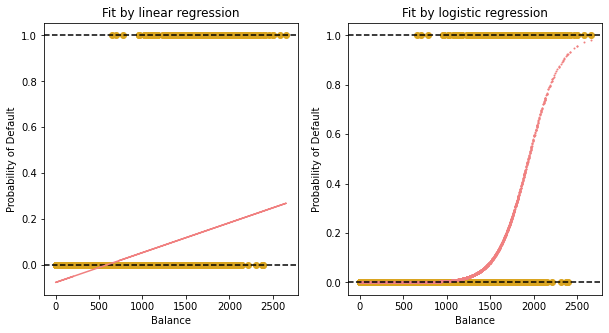

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1,2,1)
plt.axhline(y = 1, color = 'k', linestyle = '--')
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.scatter(df['balance'],y, c='goldenrod')
plt.plot(df['balance'], y_pred_lin, c='lightcoral')
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.title('Fit by linear regression')

plt.subplot(1,2,2)
plt.axhline(y = 1, color = 'k', linestyle = '--')
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.scatter(df['balance'],y, c='goldenrod')
plt.scatter(df['balance'], y_pred_log, c='lightcoral', s=1)
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.title('Fit by logistic regression')

**Optimization Problem**

* จากการที่เราต้องการ maximize log likelihood function เพื่อหาค่า $\beta$ โดยจากกปัญหาการ maximize จะเปลี่ยนเป็น minimize ได้โดยการเปลี่ยนให้เป็น negative log likelihood function


In [8]:
from scipy.optimize import minimize

In [9]:
X_ = X.to_numpy().reshape(10000,2)
y_ = y.to_numpy().reshape(10000,1)
def objective_function(b):
  f = float(-sum((X_*y_)@b) + sum(np.log(1+np.exp(X_@b))))
  return  f
x0 = np.array([[-8],[0]])
res = minimize(objective_function,x0)
print(res)

<ipython-input-9-a36da1141f0f>:7: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(objective_function,x0)
<ipython-input-9-a36da1141f0f>:4: RuntimeWarning: overflow encountered in exp
  f = float(-sum((X_*y_)@b) + sum(np.log(1+np.exp(X_@b))))
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-9-a36da1141f0f>:4: RuntimeWarning: overflow encountered in exp
  f = float(-sum((X_*y_)@b) + sum(np.log(1+np.exp(X_@b))))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 798.225842012912
        x: [-1.065e+01  5.499e-03]
      nit: 9
      jac: [ 4.730e-04  7.991e-01]
 hess_inv: [[ 1.415e-01 -8.484e-05]
            [-8.484e-05  5.252e-08]]
     nfev: 113
     njev: 31


**Cofounding Problem:** a result obtained from one predictor is different from using multiple predictors  when there are correlation among predictors.

* จากการ fit logistic regression สำหรับแค่ตัวแปร student เพียงตัวเดียวจะพบว่าค่า coefficient มีค่าเป็นบวก (students are likely to be default) แต่เมื่อนำมา fit แบบ multiple logistic regression จะพบว่า ค่า coefficient ของ student กลายเป็นค่าติดลบ เนื่องจาก student status กับ balance มี correlation กัน จะเห็นจาก box plot ด้านล่างได้ ซึ่ง student มีแนวโน้มว่าจะมี balance สูง (หนี้สูง) ซึ่งจะทำให้ probability ที่จะเป็น default มีค่าสูง 

* เพื่อพิจารณาจากกราฟด้านล่างจะพบว่า student ที่ given balance มาจะมีแนวโน้มที่จะ default น้อยกว่า non-student ที่รู้ balance แต่ student ทั้งหมเมื่อไม่รู้ balance จะมีแนวโน้มที่จะ default มากกว่า

* ดังนั้น เมื่อรู้ balance non-student จะมีโอกาส default มากกว่า แต่ เมื่อไม่รู้ balance student จะมีโอกาส default มากกว่า



In [10]:
df_ = df.replace(to_replace=["Yes","No"],value=[1,0])
X = df_['student']
X = sm.add_constant(X)
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                0.004097
Time:                        05:02:35   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student        0.4049      0.

In [11]:
df_ = df.replace(to_replace=["Yes","No"],value=[1,0])
X = sm.add_constant(df_[['student','balance','income']])
log_reg_mul = sm.Logit(df_['default'], X).fit()
print(log_reg_mul.summary())
y_pred_log_mul = log_reg_mul.predict(X)

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.4619
Time:                        05:02:35   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student       -0.6468      0

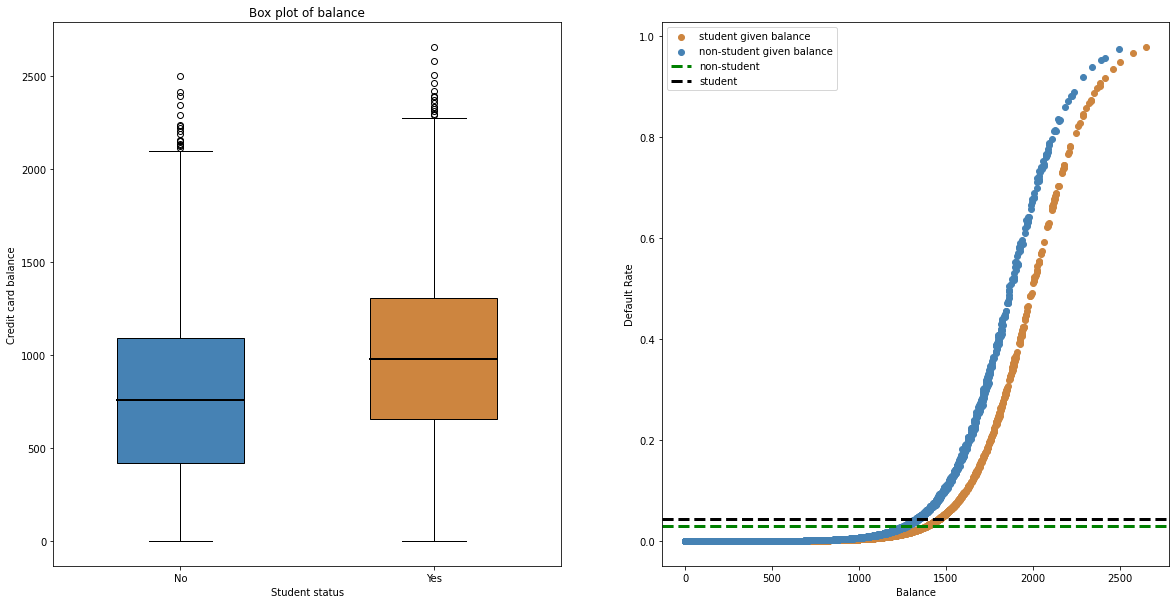

In [12]:
df_['predicted_value'] = y_pred_log_mul
df_no = df_[df['student'] == 'No']
df_yes = df_[df['student'] == 'Yes']

plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
bp = plt.boxplot([df_no['balance'], df_yes['balance']], patch_artist = True, widths=0.5)
colors = ['steelblue', 'peru']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='k',
               linewidth = 2)
plt.xticks([1, 2], ['No', 'Yes'])
plt.title('Box plot of balance')
plt.xlabel('Student status')
plt.ylabel('Credit card balance')

plt.subplot(1,2,2)
plt.scatter(df_yes['balance'], df_yes['predicted_value'], label='student given balance', c='peru')
plt.scatter(df_no['balance'], df_no['predicted_value'], label='non-student given balance', c='steelblue')
df_gb = df_.groupby(by='student').mean()
plt.axhline(y = df_gb['default'][0], color = 'g', linestyle = '--', linewidth=3, label='non-student')
plt.axhline(y = df_gb['default'][1], color = 'k', linestyle = '--',linewidth=3, label='student')
plt.ylabel('Default Rate')
plt.xlabel('Balance')
plt.legend()

**Multinomial Logistic Regression**

* Classify data into K > 2 categories
* To do this first select a single class to serve as a baseline (referenced, nominal model), choose Kth class. Then the model will be $$ Pr(Y=k|X=x) = \frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{k_p}x_p}}{1 + \sum_{l=1}^{K-1}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}}$$  
$\text{for k = 1,2,...,K-1 and}$ 
$$ Pr(Y=K|X=x) = \frac{1}{1 + \sum_{l=1}^{K-1}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}} $$ It's not hard to show that 
$$ log(\frac{Pr(Y=k|X=x}{Pr(Y=K|X=x}) = \beta_{k0}+\beta_{k1}x_1+...+\beta_{k_p}x_p$$

* The number of coefficient is $(p+1)*(K-1)$
* The decision to choose baseline is unimportant since the fitted values, the log odds between any pairs of classes amd the other key model output will be the same.
* But, The interpretation must be aware because it is tied with the choice og baseline.

**Softmax coding**

* Treat all K classes symmetrically, and assume that for k = 1,...,K,
$$ Pr(Y=k|X=x) = \frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{k_p}x_p}}{\sum_{l=1}^{K}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}} $$

* Thus, rather than estimating coefficient for K-1 classes, we actually estimate coefficient for all K classes. It's not hard to see the log odds ratio between $kth$ and $k^{'}th$ classes equals 
$$ log(\frac{Pr(Y=k|X=x)}{Pr(Y=k^{'}|X=x)}) = (\beta_{k0}-\beta_{k^{'}0})+(\beta_{k1}-\beta_{k^{'}1})x_1 +...+(\beta_{kp}-\beta_{k^{'}p})x_p $$

* widely use Machine Learning literature.

# Generative model for classification

* จะใช้คนละวิธีกับ logistic regression โดยจะทำการประมาณ posterior probability ของ Y|X แทน โดยใช้ Bayes' Rule เข้ามาช่วย 
* Suppose that we want to classify K classes, Let $\pi_k$ represent prior probability that come from class k. Let $f_k(X)=Pr(X|Y=k)$ denote the class likelihood. Then Bayes' theorem state that $$ Pr(Y=k|X=x) = \frac{\pi_kf_k(x)}{\sum_{l=1}^K\pi_lf_l(x)} $$
* Estimating $\pi_k$ is easy if we have a random sample from a population: we simply computr the fraction of the training observation that belong to k class. To estimate $f_k(x)$, we will typically have to make simplifying assumptions.

**Linear Discriminant Analysis (LDA)**

For p = 1 case that is we only have 1 predictor
  * assume $f_k(x)$ is gaussian and variance for all classes are equal
  * Posterior probability is $$ p_k(x) = \frac{\pi_k\frac{1}{\sqrt{2\pi}σ}exp(-\frac{1}{2σ^2}(x-μ_k)^2)}{\sum_{l=1}^K\pi_l\frac{1}{\sqrt{2\pi}σ}exp(-\frac{1}{2σ^2}(x-\mu)^2)} $$
  * Taking the log of $p_k(x)$ and rearranging the terms, it's not hard to show that this is equivalent assigning the observation to the class for which $$ \delta_k(x)=x\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + log(\pi_k) $$ is the largest. After taking log, the term $x^2/(2\sigma^2)$ will be equal for all classes, so we will emit this term in consideration.
  * If K = 2 and $\pi_1=\pi_2$, then the **Bayes classifier** assigns an observation to class 1 if $2x(\mu_1-\mu_2)>\mu_1^2-\mu_2^2$ and to class 2 otherwise. The Bayes decision boundary is the point for which $\delta_1(x)=\delta_2(x)$; one can show that this amounts to $$ x = \frac{\mu_1^2-\mu_2^2}{2(\mu_1-\mu_2)} = \frac{\mu_1+\mu_2}{2} $$
  * From the example below, If we assume that an observation is euqally likely to come from either class then by inspection we see that the Bayes classifer assign to class 1 if x is less than 0 and class to otherwise. Note that we can compute Bayes decision boundary because we know that X is drawn from what distribution within each class, and we know all the paremeter involve. In a real-life situation, we are not able to calculate the Bayes classifier.
  * In practice, we have to estimate the parameter $\mu_k$ and $\pi_k$ and $\sigma^2$ which using this equations: $$ \mu_k = \frac{1}{n_k}\sum_{i:y_i=k}x_i \text{,  } \hat{\sigma}^2 = \frac{1}{n-k}\sum_{k=1}^K\sum_{i:y_i=k}(x_i-\hat{\mu_k})^2\text{,  } \pi_k = \frac{n_k}{n} $$


For p > 1
  *  The posterior probability is $$ p_k(x) =  \frac{\pi_k exp(-\frac{1}{2}(x-μ_k)^T𝚺^{-1}(x-μ_k))}{\sum_{l=1}^K\pi_lexp(-\frac{1}{2}(x-μ_l)^T𝚺^{-1}(x-μ_l))} $$
  * Taking the log of $p_k(x)$ and rearranging the terms, it's not hard to show that this is equivalent assigning the observation to the class for which $$ \delta_k(x)= x^T𝚺^{-1}\mu_k - \frac{1}{2}\mu_k^T𝚺^{-1}\mu_k + log(\pi_k) $$ is the largest.
  * To make a decision boundary, we will let $\delta_1(x) = \delta_2(x)$, so this boudary decision is linear in $x$.


**In summary, The LDA classifier results from assuming that the observation within each class come from a normal distribution with a class specific mean and a common covariance.**


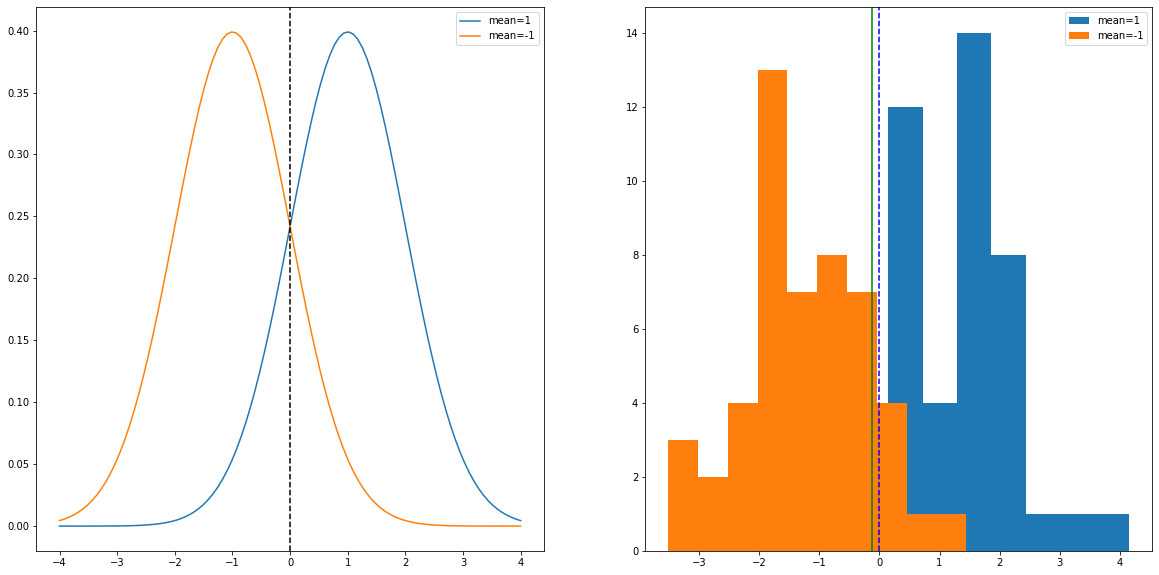

In [45]:
plt.subplots(1,2,figsize=(20,10))

plt.subplot(1,2,1)
x = np.linspace(-4,4, 100)
plt.plot(x, norm.pdf(x,1,1), label='mean=1')
plt.plot(x, norm.pdf(x,-1,1), label='mean=-1')
plt.axvline(0, c='k', linestyle='--')
plt.legend()

plt.subplot(1,2,2)
x1 = np.random.normal(loc=1.0, scale=1.0, size=50)
x2 = np.random.normal(loc=-1.0, scale=1.0, size=50)
mu1 = np.mean(x1)
mu2 = np.mean(x2)
plt.hist(x1,label='mean=1')
plt.hist(x2,label='mean=-1')
plt.axvline(0, c='b', linestyle='--')
plt.axvline((mu1+mu2)/2,c='g')
plt.legend()

**Quadratic Discriminant Analysis (QDA)**

  * Like LDA, the QDA classifier results from assuming that the observations from each class are drwan from a guassian distribution, and plugging for the parameter into Bayes' theorem in order to perform prediction. However, in contrast to LDA, QDA asuume that each class has covariance matrix. That is assume that observations form the kth class is of the form X is $Normal(\mu_k,Σ_k)$. Under this assumption, Bayes classifier assign an observation to the class for which $$ \delta_k(x)= -\frac{1}{2}x^TΣ_k^{-1}x + x^TΣ^{-1}_k\mu_k - \frac{1}{2}\mu_k^TΣ^{-1}_k\mu_k - \frac{1}{2}log|Σ_k| + log(\pi_k)  $$ is the largest. 
  * From $ \delta_k(x)$, the decision boundary is quadratic in $x$.



In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [156]:
np.random.seed(1)
x_1 = np.random.multivariate_normal([0,1], [[2,1],[1,2]], 100)
x_2 = np.random.multivariate_normal([2,2], [[2,1],[1,2]],100)
y = np.concatenate((np.ones((100,1)), 2*np.ones((100,1))))
X1 = np.concatenate((x_1,x_2), axis=0)
np.random.seed(2)
x_3 = np.random.multivariate_normal([0,1], [[1,1],[1,2]], 100)
x_4 = np.random.multivariate_normal([2,2], [[1,0.5],[0.5,3]],100)
X2 = np.concatenate((x_3,x_4), axis=0)

In [157]:
lda1 = LinearDiscriminantAnalysis()
lda1.fit(X1, y)
qda1 = QuadraticDiscriminantAnalysis()
qda1.fit(X1, y)

lda2 = LinearDiscriminantAnalysis()
lda2.fit(X2, y)
qda2 = QuadraticDiscriminantAnalysis()
qda2.fit(X2, y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

QuadraticDiscriminantAnalysis()

<ipython-input-159-edaa5f87b494>:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='LDA')
<ipython-input-159-edaa5f87b494>:14: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z2, [0.5], linewidths=2.0, colors="g", label='QDA')
<ipython-input-159-edaa5f87b494>:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='LDA')
<ipython-input-159-edaa5f87b494>:28: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z2, [0.5], linewidths=2.0, colors="g", label='QDA')


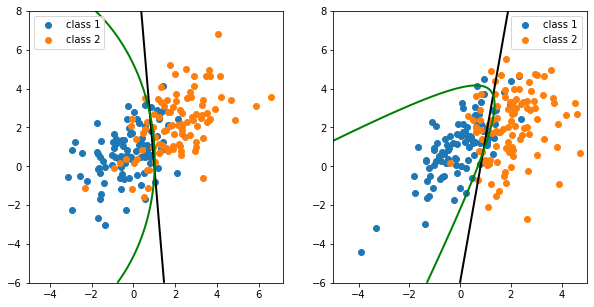

In [159]:
plt.subplots(1,2, figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x_1[:,0],x_1[:,1], label='class 1')
plt.scatter(x_2[:,0],x_2[:,1], label='class 2')
nx, ny = 400, 400
xx, yy = np.meshgrid(np.linspace(-5, 5, nx), np.linspace(-6, 8, ny))
a=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
Z = lda1.predict_proba(a)
Z = Z[:, 1].reshape(xx.shape)
Z2 = qda1.predict_proba(a)
Z2 = Z2[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='LDA')
plt.contour(xx, yy, Z2, [0.5], linewidths=2.0, colors="g", label='QDA')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x_3[:,0],x_3[:,1], label='class 1')
plt.scatter(x_4[:,0],x_4[:,1], label='class 2')
nx, ny = 400, 400
xx, yy = np.meshgrid(np.linspace(-5, 5, nx), np.linspace(-6, 8, ny))
a=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
Z = lda2.predict_proba(a)
Z = Z[:, 1].reshape(xx.shape)
Z2 = qda2.predict_proba(a)
Z2 = Z2[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='LDA')
plt.contour(xx, yy, Z2, [0.5], linewidths=2.0, colors="g", label='QDA')
plt.legend()

* From the above example, in the left hand, The two gaussian classes have a common correlation. As a result, the Bayes decision boundary is linear and is accurately approximated by LDA decision boundary. The QDA decision boundary is inferior, because it suffers from higher variance without a corresponding decrease in bias. In contrast, the right hand figure displays a situation in which the two classes have different covriance matrix. Now the Bayes decision boundary is quadratic, and so QDA more accurately approximates this boundary than does LDA.


**Naive Bayes**

*  The assumption of this approach is that input $X_k$'s are conditionally independent 